In [1]:
import os 
import pandas as pd 
xls = pd.ExcelFile("../AEM_MOF_totT.xlsx")
print(xls.sheet_names)  # 시트 이름 리스트 출력
data = {}
for sheet_T in xls.sheet_names:
    df= pd.read_excel("../AEM_MOF_totT.xlsx", sheet_name=sheet_T)
    O2_col =["Adsorbent"] + [ x for x in df.columns if "O2" in x and "CO2" not in  x ]
    CO2_col = ["Adsorbent"] +[ x for x in df.columns if "CO2" in x ]
    df[O2_col].to_csv(f"[DATA]O2_{sheet_T}_2024nahyeon_ver.csv")
    df[CO2_col].to_csv(f"[DATA]CO2_{sheet_T}_2024nahyeon_ver.csv")





['283K', '293K', '303K', '313K']


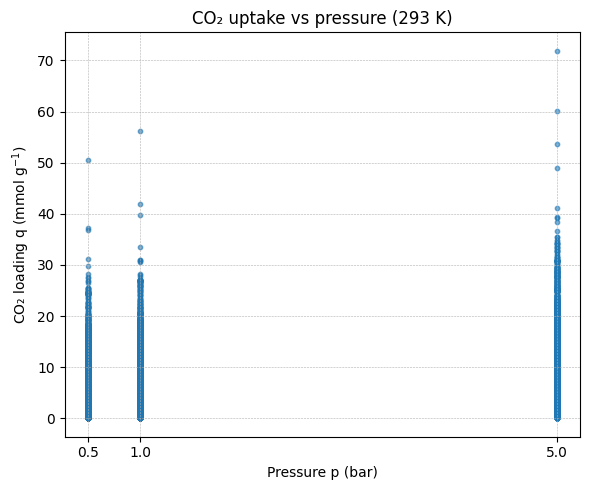

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) CSV 읽기
df = pd.read_csv("./[DATA]CO2_293K_2024nahyeon_ver.csv")

# 2) wide → long: 열 이름 → Pressure, 값 → Loading
pressure_cols = ["CO2_20C_0.5bar", "CO2_20C_1bar", "CO2_20C_5bar"]
long = (
    df.melt(id_vars=["Adsorbent"],           # 그대로 둘 열
            value_vars=pressure_cols,        # 녹일 열
            var_name="Pressure",             # 새 열 이름
            value_name="Loading")            # 값 열 이름
)

# 3) 문자열 "CO2_20C_0.5bar" → 숫자 0.5 로 변환해 p 축으로 사용
long["p"] = long["Pressure"].str.extract(r"_(\d+\.?\d*)bar").astype(float)

# 4) 산점도
plt.figure(figsize=(6, 5))
plt.scatter(long["p"], long["Loading"], s=10, alpha=0.6)
plt.xlabel("Pressure p (bar)")
plt.ylabel("CO₂ loading q (mmol g$^{-1}$)")
plt.title("CO₂ uptake vs pressure (293 K)")
plt.xticks([0.5, 1, 5])           # 필요하면 15 bar 등 추가
plt.grid(True, ls="--", lw=0.4)
plt.tight_layout()
plt.show()


In [29]:
TC =10 
TK = 273 + TC

df1 = pd.read_csv(f"./[DATA]O2_{TK}K_2024nahyeon_ver.csv").iloc[:,1:]

df2 = pd.read_csv(f"../result_O2_{TC}C_0.001bar.csv")[["Adsorbent", "Uptake (mol/kg)"]]

df3 = pd.merge( df2, df1, on="Adsorbent", how="inner")
df3.columns = ['Adsorbent', f'O2_{TC}C_0.001bar', f'O2_{TC}C_0.5bar', f'O2_{TC}C_1bar',
       f'O2_{TC}C_5bar']

df3.to_csv(f"../result_O2_{TC}C_2024nahyeon_ver.csv", index=False)

In [32]:
TC =20 
TK = 273 + TC

df1 = pd.read_csv(f"./[DATA]O2_{TK}K_2024nahyeon_ver.csv").iloc[:,1:]

df2 = pd.read_csv(f"../result_O2_{TC}C_0.001bar.csv")[["Adsorbent", "Uptake (mol/kg)"]]

df3 = pd.merge( df2, df1, on="Adsorbent", how="inner")
df3.columns = ['Adsorbent', f'O2_{TC}C_0.001bar', f'O2_{TC}C_0.5bar', f'O2_{TC}C_1bar',
       f'O2_{TC}C_5bar', f'O2_{TC}C_15bar']
df3.to_csv(f"../result_O2_{TC}C_2024nahyeon_ver.csv", index=False)


In [ ]:
TC =30 
TK = 273 + TC

df1 = pd.read_csv(f"./[DATA]O2_{TK}K_2024nahyeon_ver.csv").iloc[:,1:]

df2 = pd.read_csv(f"../result_O2_{TC}C_0.001bar.csv")[["Adsorbent", "Uptake (mol/kg)"]]

df3 = pd.merge( df2, df1, on="Adsorbent", how="inner")
df3.columns = ['Adsorbent', f'O2_{TC}C_0.001bar', f'O2_{TC}C_0.5bar', f'O2_{TC}C_1bar',
       f'O2_{TC}C_5bar']

df3.to_csv(f"../result_O2_{TC}C_2024nahyeon_ver.csv", index=False)

In [34]:
TC =40 
TK = 273 + TC

df1 = pd.read_csv(f"./[DATA]O2_{TK}K_2024nahyeon_ver.csv").iloc[:,1:]

df2 = pd.read_csv(f"../result_O2_{TC}C_0.001bar.csv")[["Adsorbent", "Uptake (mol/kg)"]]

df3 = pd.merge( df2, df1, on="Adsorbent", how="inner")
df3.columns = ['Adsorbent', f'O2_{TC}C_0.001bar', f'O2_{TC}C_0.5bar', f'O2_{TC}C_1bar',
       f'O2_{TC}C_5bar']

df3.to_csv(f"../result_O2_{TC}C_2024nahyeon_ver.csv", index=False)

In [38]:
TC =10 
TK = 273 + TC

df1 = pd.read_csv(f"./[DATA]CO2_{TK}K_2024nahyeon_ver.csv").iloc[:,1:]

df1.to_csv(f"../result_CO2_{TC}C_2024nahyeon_ver.csv", index=False)